explore data and prepare for model building

In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

if 'pSat' in train_data.columns:
    train_data['log_pSat'] = np.log10(train_data['pSat'])
    train_data = train_data.drop(columns=['pSat'])
elif 'log_pSat_Pa' in train_data.columns:
    train_data = train_data.rename(columns={'log_pSat_Pa': 'log_pSat'})
else:
    print("Neither 'pSat' nor 'log_pSat_Pa' columns found in train_data")

print(train_data.head())

print(test_data.head())

   ID   log_pSat          MW  NumOfAtoms  NumOfC  NumOfO  NumOfN  \
0   0 -11.295070  224.016832          23       6       9       0   
1   1  -4.782500  310.064845          35       9      10       2   
2   2  -6.204319  368.033938          37      10      13       2   
3   3  -9.672591  299.012475          29       7      12       1   
4   4  -4.252058  202.011353          20       7       7       0   

   NumHBondDonors  NumOfConf  NumOfConfUsed  ... ester  ether (alicyclic)  \
0               4      485.0           40.0  ...     0                  1   
1               1      236.0           40.0  ...     0                  0   
2               1      308.0           40.0  ...     0                  0   
3               4      769.0            3.0  ...     0                  0   
4               1       77.0           32.0  ...     0                  1   

   nitrate  nitro  aromatic hydroxyl  carbonylperoxynitrate  peroxide  \
0        0      0                  0                   

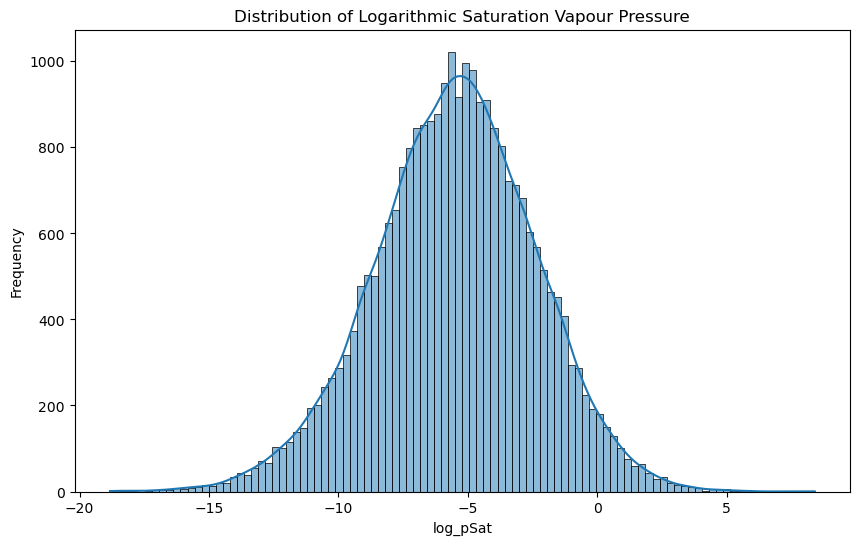

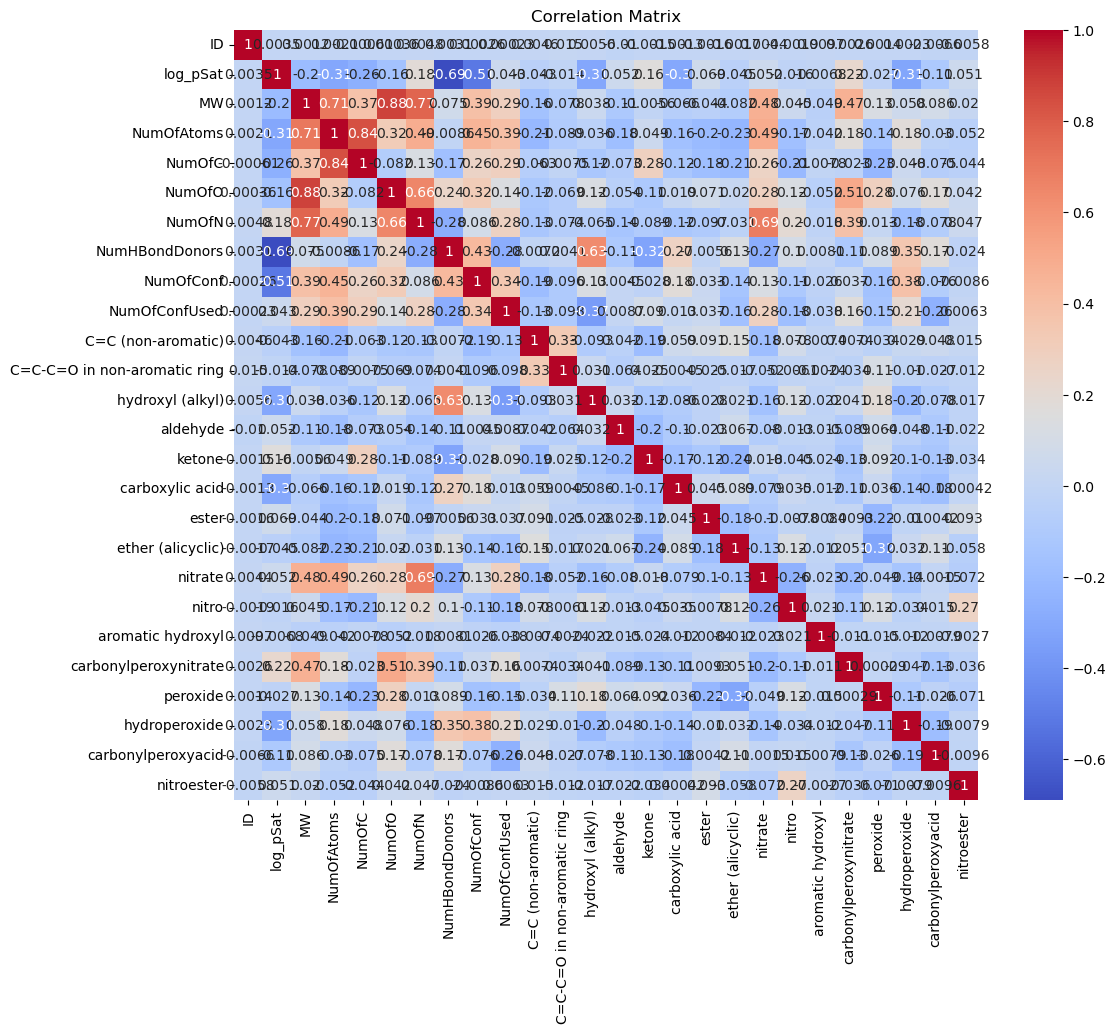

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train_data['log_pSat'], kde=True)
plt.title('Distribution of Logarithmic Saturation Vapour Pressure')
plt.xlabel('log_pSat')
plt.ylabel('Frequency')
plt.show()

numeric_columns = train_data.select_dtypes(include=[np.number]).columns
correlation_matrix = train_data[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()